In [1]:
import matplotlib.pyplot as plt

from distributions.sequence import Sequence

from algorithms.full_bandit_exp3 import FullBanditExp3

import numpy as np
import pandas as pd
import seaborn as sns

import pickle
import json

import os

In [2]:
def get_name(run_name):
    return run_name.split("_")[0]

def get_length(run_name):
    return run_name.split("_")[1]

def theoretical_bound(T, sequence: Sequence):
    return 8 * sequence.m * np.sqrt(T * sequence.K * sequence.d * np.log(np.e * sequence.K / sequence.m) * np.log(np.sqrt(T) * sequence.m * sequence.sigma * sequence.R))



In [3]:
sample_sequences = {}
results = {}
distributions = os.listdir(f"output/")
for dist_index, dist in enumerate(distributions):
    results[dist] = {}
    sample_sequences[dist] = {}

    lengths = os.listdir(f"output/{dist}")

    for length_index, length in enumerate(lengths):
        results[dist][length] = {}
        
        with open(f"output/{dist}/{length}/0/sequence.json", "rb") as input_file:
            sample_sequences[dist][length] = pickle.load(input_file)

        algo_names = os.listdir(f"output/{dist}/{length}/0")
        algo_names = np.unique([x.split("_")[0] for x in algo_names])
        algo_names = algo_names[algo_names != "sequence.json"]
        print(algo_names)

        for algo_name in algo_names:
            results[dist][length][algo_name] = {
                "regret": [],
                "gamma": [],
                "time_elapsed": [],
            }

            iterations = os.listdir(f"output/{dist}/{length}/")
            for iteration in iterations:
                with open(f"output/{dist}/{length}/{iteration}/{algo_name}_general_info.json", "r") as input_file:
                    input_dict = json.load(input_file)

                result_buffer = results[dist][length][algo_name]
                result_buffer["regret"].append(input_dict["regret"])
                result_buffer["gamma"].append(input_dict["gamma"])
                result_buffer["time_elapsed"].append(input_dict["time_elapsed"])

for dist_name in results.keys():
    for length in results[dist_name].keys():
        for algo_name in results[dist_name][length].keys():
            for key in results[dist_name][length][algo_name].keys():
                results[dist_name][length][algo_name][key] = np.array(results[dist_name][length][algo_name][key])

['FullBanditExp3Inv'
 'FullBanditExp3Invgamma=0.003162277660168379eta=0.003162277660168379'
 'NonContextualExp3'
 'NonContextualExp3gamma=0.003162277660168379eta=0.003162277660168379'
 'OnePerContext' 'OnePerContextSB'
 'OnePerContextSBgamma=0.003162277660168379eta=0.003162277660168379'
 'OnePerContextgamma=0.003162277660168379eta=0.003162277660168379'
 'RealLinExp3'
 'RealLinExp3gamma=0.003162277660168379eta=0.003162277660168379'
 'SemiBanditFTRLInv'
 'SemiBanditFTRLInvgamma=0.003162277660168379eta=0.003162277660168379'
 'UniformRandom'
 'UniformRandomgamma=0.003162277660168379eta=0.003162277660168379']
['FullBanditExp3Inv'
 'FullBanditExp3Invgamma=0.003162277660168379eta=0.003162277660168379'
 'NonContextualExp3'
 'NonContextualExp3gamma=0.003162277660168379eta=0.003162277660168379'
 'OnePerContext' 'OnePerContextSB'
 'OnePerContextSBgamma=0.003162277660168379eta=0.003162277660168379'
 'OnePerContextgamma=0.003162277660168379eta=0.003162277660168379'
 'RealLinExp3'
 'RealLinExp3gamma

In [4]:
context_mset_dict = {
    3: 1, 
    5: 2,
    12: 3
}

algo_name_dict = {
    "OnePerContextSB": "ComBandSB $d$-times",
    "FullBanditExp3Inv": "EXP3-Tensor",
    "NonContextualExp3": "ComBand",
    "RealLinExp3": "RealLinExp3",
    "SemiBanditFTRLInv": "SemiBanditFTRL",
    "UniformRandom": "UniformRandom",
    "OnePerContext": "ComBand $d$-times"
}

for key in list(algo_name_dict.keys()):
    adjusted_key = key + "gamma=0.003162277660168379eta=0.003162277660168379"
    algo_name_dict[adjusted_key] = algo_name_dict[key] + "Override"

algo_name_list = results[dist_name][length]

print(r"\begin{table}[]")
print(r"\begin{tabular}{" + "l" * (len(results[dist_name][length]) + 1) + "}")
print("", end="")
for algo_name in algo_name_list:
    print(" & ", end="")
    print(algo_name_dict[algo_name], end="")
print(r"\\")

for length in results[dist_name].keys():
    for dist_name in results.keys():
        sequence = sample_sequences[dist_name][length]
        print(f"Context {sequence.d}/{context_mset_dict[sequence.d]} Actionset {sequence.K}/{sequence.m}", end="")

        for algo_name in algo_name_list:
            regret_list = results[dist_name][length][algo_name]["regret"]
            print(" & ", end="")
            print(np.average(regret_list), end="")
            
        print(r"\\")

print(r"\end{tabular}")
print(r"\end{table}")


\begin{table}[]
\begin{tabular}{lllllllllllllll}
 & EXP3-Tensor & EXP3-TensorOverride & ComBand & ComBandOverride & ComBand $d$-times & ComBandSB $d$-times & ComBandSB $d$-timesOverride & ComBand $d$-timesOverride & RealLinExp3 & RealLinExp3Override & SemiBanditFTRL & SemiBanditFTRLOverride & UniformRandom & UniformRandomOverride\\
Context 3/1 Actionset 3/1 & 950.44 & 3934.04 & 4014.24 & 3828.2 & 900.4 & 472.04 & 400.68 & 900.4 & 3417.28 & 553.76 & 1891.16 & 531.64 & 6625.84 & 6625.84\\
Context 3/1 Actionset 5/2 & 4073.24 & 9438.72 & 8321.96 & 8136.56 & 2054.32 & 9501.56 & 9495.44 & 2054.32 & 7961.76 & 3614.6 & 5343.04 & 902.16 & 11912.92 & 11912.92\\
Context 3/1 Actionset 8/3 & 8846.56 & 16598.52 & 9866.68 & 9930.04 & 5073.4 & 15996.52 & 16030.48 & 5073.4 & 15771.88 & 16078.24 & 13926.48 & 1438.52 & 18713.48 & 18713.48\\
Context 5/2 Actionset 3/1 & 5131.36 & 5065.36 & 4809.44 & 4754.2 & 1489.56 & 978.68 & 963.4 & 1489.56 & 2703.96 & 698.8 & 2110.4 & 689.12 & 5716.36 & 5716.36\\
Contex

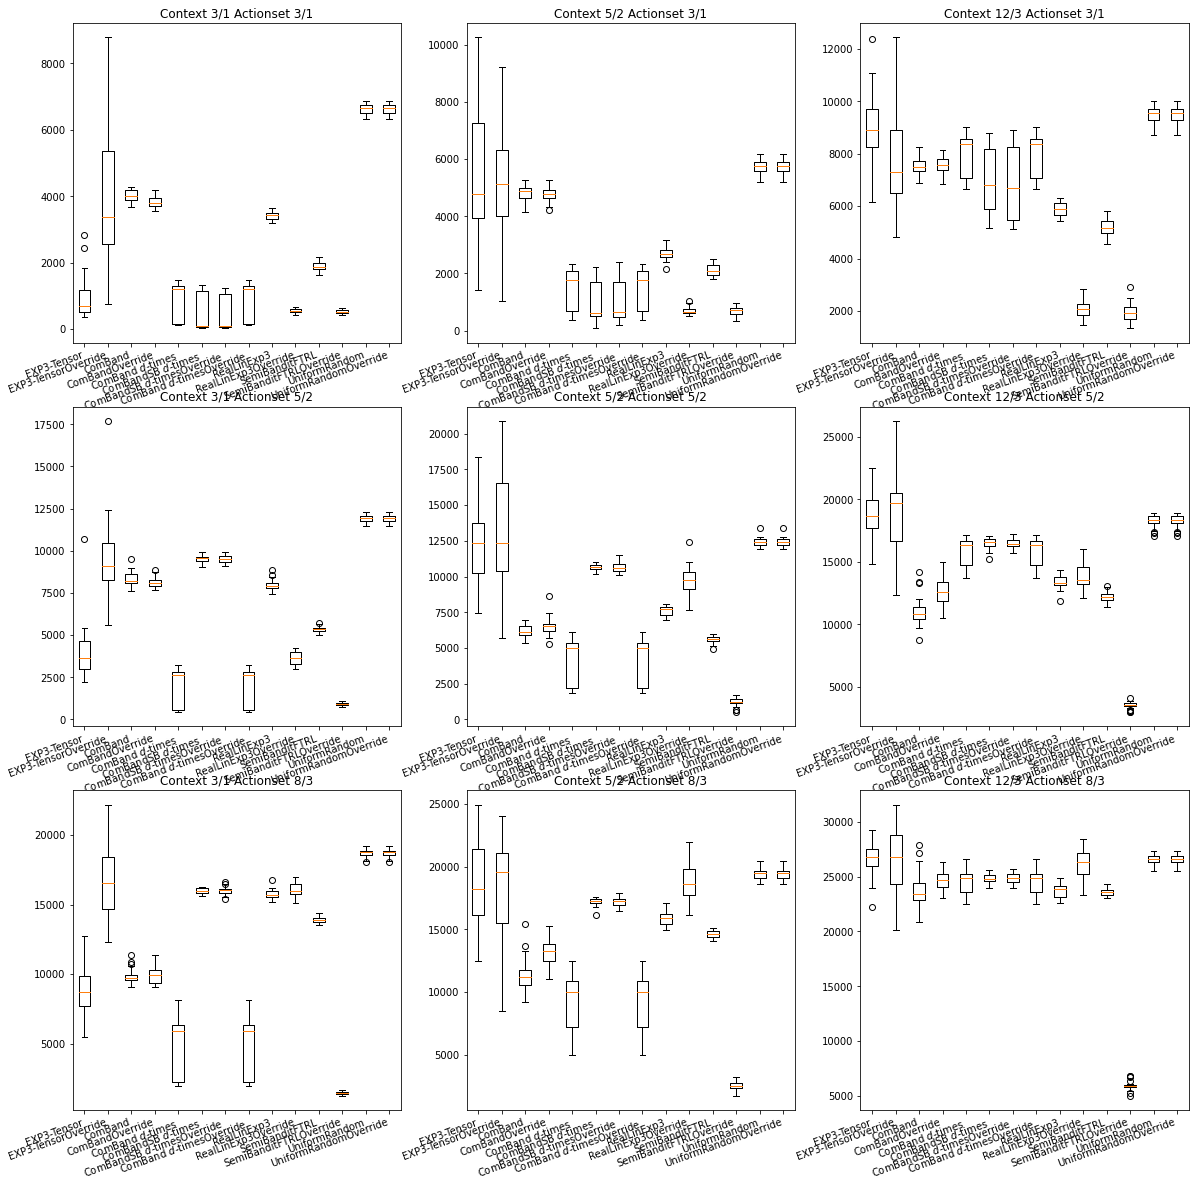

In [5]:
import matplotlib.pyplot as plt

algo_name_list = results[dist_name][length]

number_of_ds = []
number_of_Ks = []
for length in results[dist_name].keys():
    for dist_name in results.keys():
        number_of_ds.append(sample_sequences[dist_name][length].d)
        number_of_Ks.append(sample_sequences[dist_name][length].K)

number_of_ds = np.unique(number_of_ds)
number_of_Ks = np.unique(number_of_Ks)

fig, axs = plt.subplots(len(number_of_Ks), len(number_of_ds), figsize=(20, 20))

for length in results[dist_name].keys():
    for dist_name in results.keys():
        sequence = sample_sequences[dist_name][length]

        full_regret_list = []
        labels = []
        for index, algo_name in enumerate(algo_name_list):
            regret_list = results[dist_name][length][algo_name]["regret"]
            full_regret_list.append(regret_list)
            labels.append(algo_name_dict[algo_name])

            indcies = (np.where(number_of_Ks == sequence.K)[0][0], np.where(number_of_ds == sequence.d)[0][0])
            axs[indcies].set_title(f"Context {sequence.d}/{context_mset_dict[sequence.d]} Actionset {sequence.K}/{sequence.m}")
            #axs[indcies].plot(index, np.mean(regret_list), marker="o", markersize=20, label=algo_name_dict[algo_name])
            #axs[indcies].legend()
        
        axs[indcies].boxplot(full_regret_list, labels=labels)
        plt.setp(axs[indcies].get_xticklabels(), rotation=20, horizontalalignment='right')